In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# import gdown

# file_id = "1iYIlLNDclSyMLDs8Y8SBDeuOiOIkUXLo"
# url = f"https://drive.google.com/uc?id={file_id}"

# gdown.download(url, "data.csv", quiet=False)


In [27]:
data = pd.read_csv("../data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0,2.3,0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250,0.0,1.0,187.0,0,3.5,0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0,1.4,2,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0,0.8,2,0.0,2.0,1
4,NaN,0.0,0.0,120.0,354,0.0,1.0,163.0,1,0.6,2,0.0,2.0,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       307 non-null    float64
 1   sex       309 non-null    float64
 2   cp        309 non-null    float64
 3   trestbps  308 non-null    float64
 4   chol      305 non-null    object 
 5   fbs       307 non-null    float64
 6   restecg   309 non-null    float64
 7   thalach   307 non-null    float64
 8   exang     310 non-null    int64  
 9   oldpeak   309 non-null    float64
 10  slope     310 non-null    int64  
 11  ca        308 non-null    float64
 12  thal      308 non-null    float64
 13  target    310 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 34.0+ KB


In [29]:
data.isna().sum()

age         3
sex         1
cp          1
trestbps    2
chol        5
fbs         3
restecg     1
thalach     3
exang       0
oldpeak     1
slope       0
ca          2
thal        2
target      0
dtype: int64

In [30]:
data.duplicated().sum()

np.int64(8)

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.shape

(302, 14)

In [33]:
for col in data.columns:
    print(col, data[col].unique())
    print('--------------------------')

age [63. 37. 41. 56. nan 57. 44. 52. 54. 48. 49. 64. 58. 50. 66. 43. 69. 59.
 42. 61. 40. 71. 51. 65. 53. 46. 45. 39. 47. 62. 34. 35. 29. 55. 60. 67.
 68. 74. 76. 70. 38. 77.]
--------------------------
sex [ 1.  0. nan]
--------------------------
cp [ 3.  2.  1.  0. nan]
--------------------------
trestbps [145. 130. 120. 140. 172. 150. 110. 135. 160. 105. 125. 142. 155. 104.
 138.  nan 108. 134. 122. 115. 118. 128. 100. 124.  94. 112. 102. 152.
 101. 132. 148. 178. 129. 180. 136. 126. 106. 156. 170. 146. 117. 200.
 165. 174. 192. 144. 123. 154. 114. 164.]
--------------------------
chol ['233' '250' '204' '236' '354' '192' '294' nan '199' '168' '239' '275'
 '266' '211' '283' '219' '340' '226' '247' '234' '243' '302' '212' '175'
 '417' '197' '198' '177' '273' '213' '304' '232' '269' '360' '308' '245'
 '208' '264' '321' '325' '235' '257' '256' '231' '141' '252' '201' '222'
 '260' '182' '303' '265' '309' '186' '203' '183' '220' '209' '258' '227'
 '261' '221' '205' '240' '318' '298' '564

In [34]:
data['chol'].replace('twenty', 0, inplace=True)
data['chol'].replace('ss', 0, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12852\4285824057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['chol'].replace('twenty', 0, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_12852\4285824057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [35]:
data['chol'] = pd.to_numeric(data['chol'])


In [36]:
data['chol'].replace(0, data['chol'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12852\3101134729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['chol'].replace(0, data['chol'].mean(), inplace=True)


In [37]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['thalach'].fillna(data['thalach'].mean(), inplace=True)
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)
data['trestbps'].fillna(data['trestbps'].mean(), inplace=True)
data['chol'].fillna(data['chol'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12852\2269653625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_12852\2269653625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [38]:
data['sex'].fillna(data['sex'].mode()[0], inplace=True)
data['cp'].fillna(data['cp'].mode()[0], inplace=True)
data['fbs'].fillna(data['fbs'].mode()[0], inplace=True)
data['restecg'].fillna(data['restecg'].mode()[0], inplace=True)
data['ca'].fillna(data['ca'].mode()[0], inplace=True)
data['thal'].fillna(data['thal'].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12852\3121357450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(data['sex'].mode()[0], inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_12852\3121357450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [39]:
def getOutliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    outliers = data[col].loc[((data[col] > upper) | (data[col] < lower))]
    return outliers

def getNewColWithoutOutliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    newCol = data[col].copy()
    newCol.loc[(data[col] > upper)] = upper
    newCol.loc[(data[col] < lower)] = lower
    return newCol



<Axes: ylabel='trestbps'>

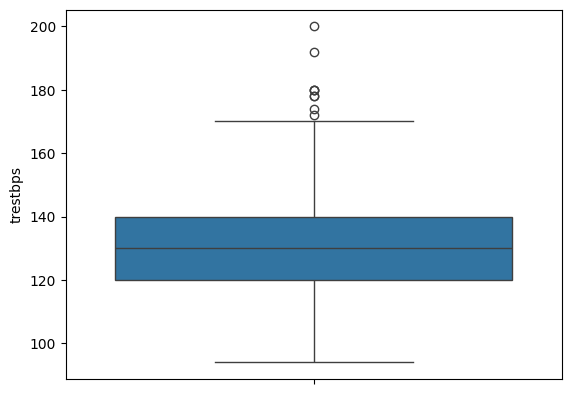

In [40]:
sns.boxplot(data['trestbps'])


<Axes: ylabel='chol'>

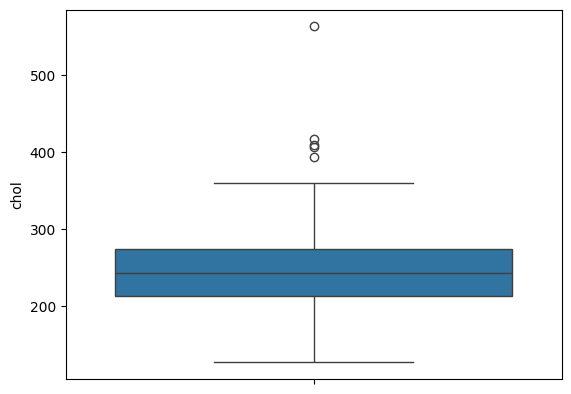

In [41]:
sns.boxplot(data['chol'])

<Axes: ylabel='thalach'>

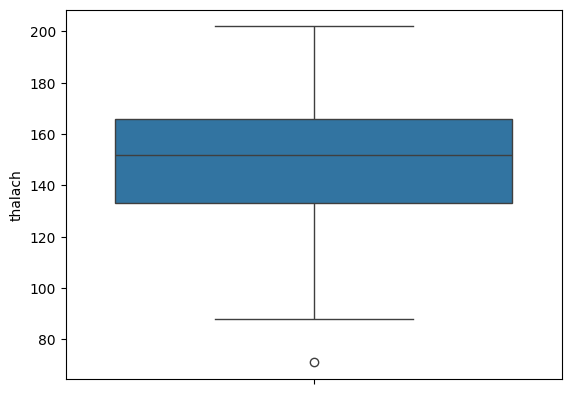

In [42]:
sns.boxplot(data['thalach'])

<Axes: ylabel='oldpeak'>

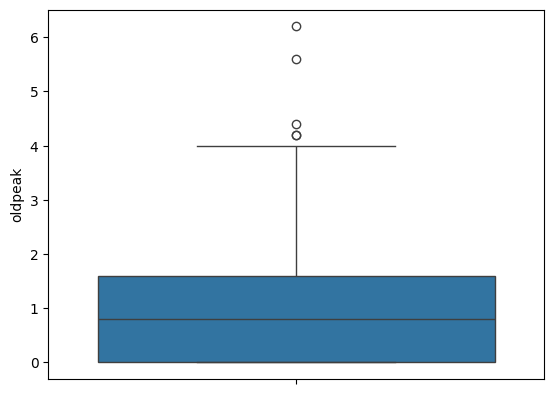

In [43]:
sns.boxplot(data['oldpeak'])

In [44]:
data['trestbps'] = getNewColWithoutOutliers('trestbps')
data['chol'] = getNewColWithoutOutliers('chol')
data['thalach'] = getNewColWithoutOutliers('thalach')
data['oldpeak'] = getNewColWithoutOutliers('oldpeak')

<Axes: >

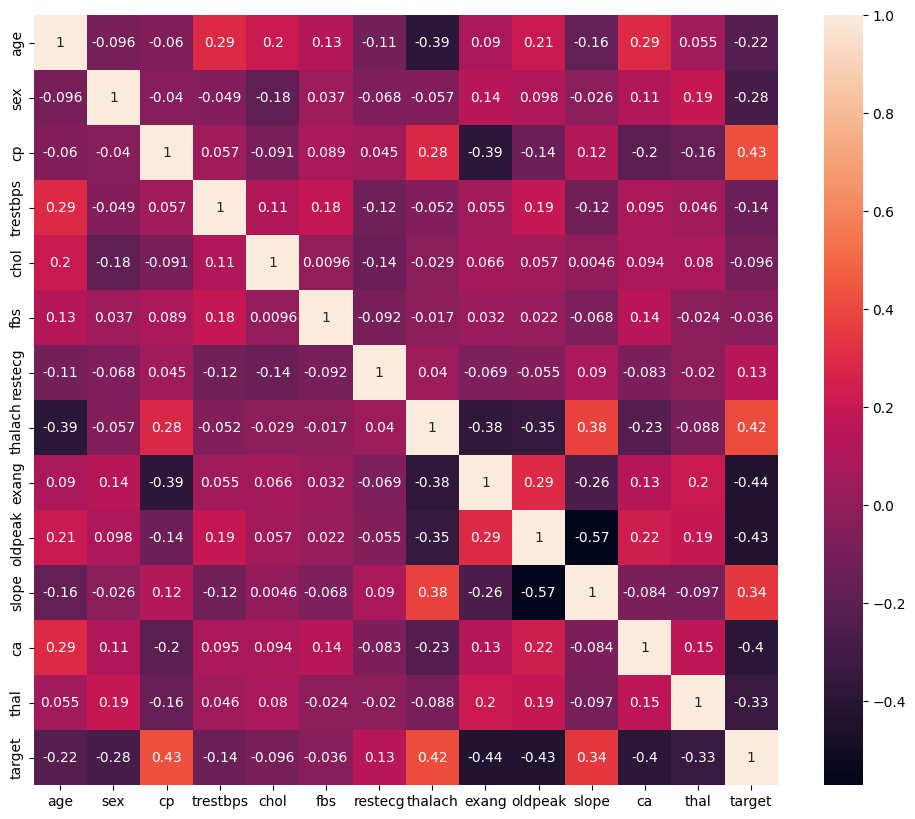

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

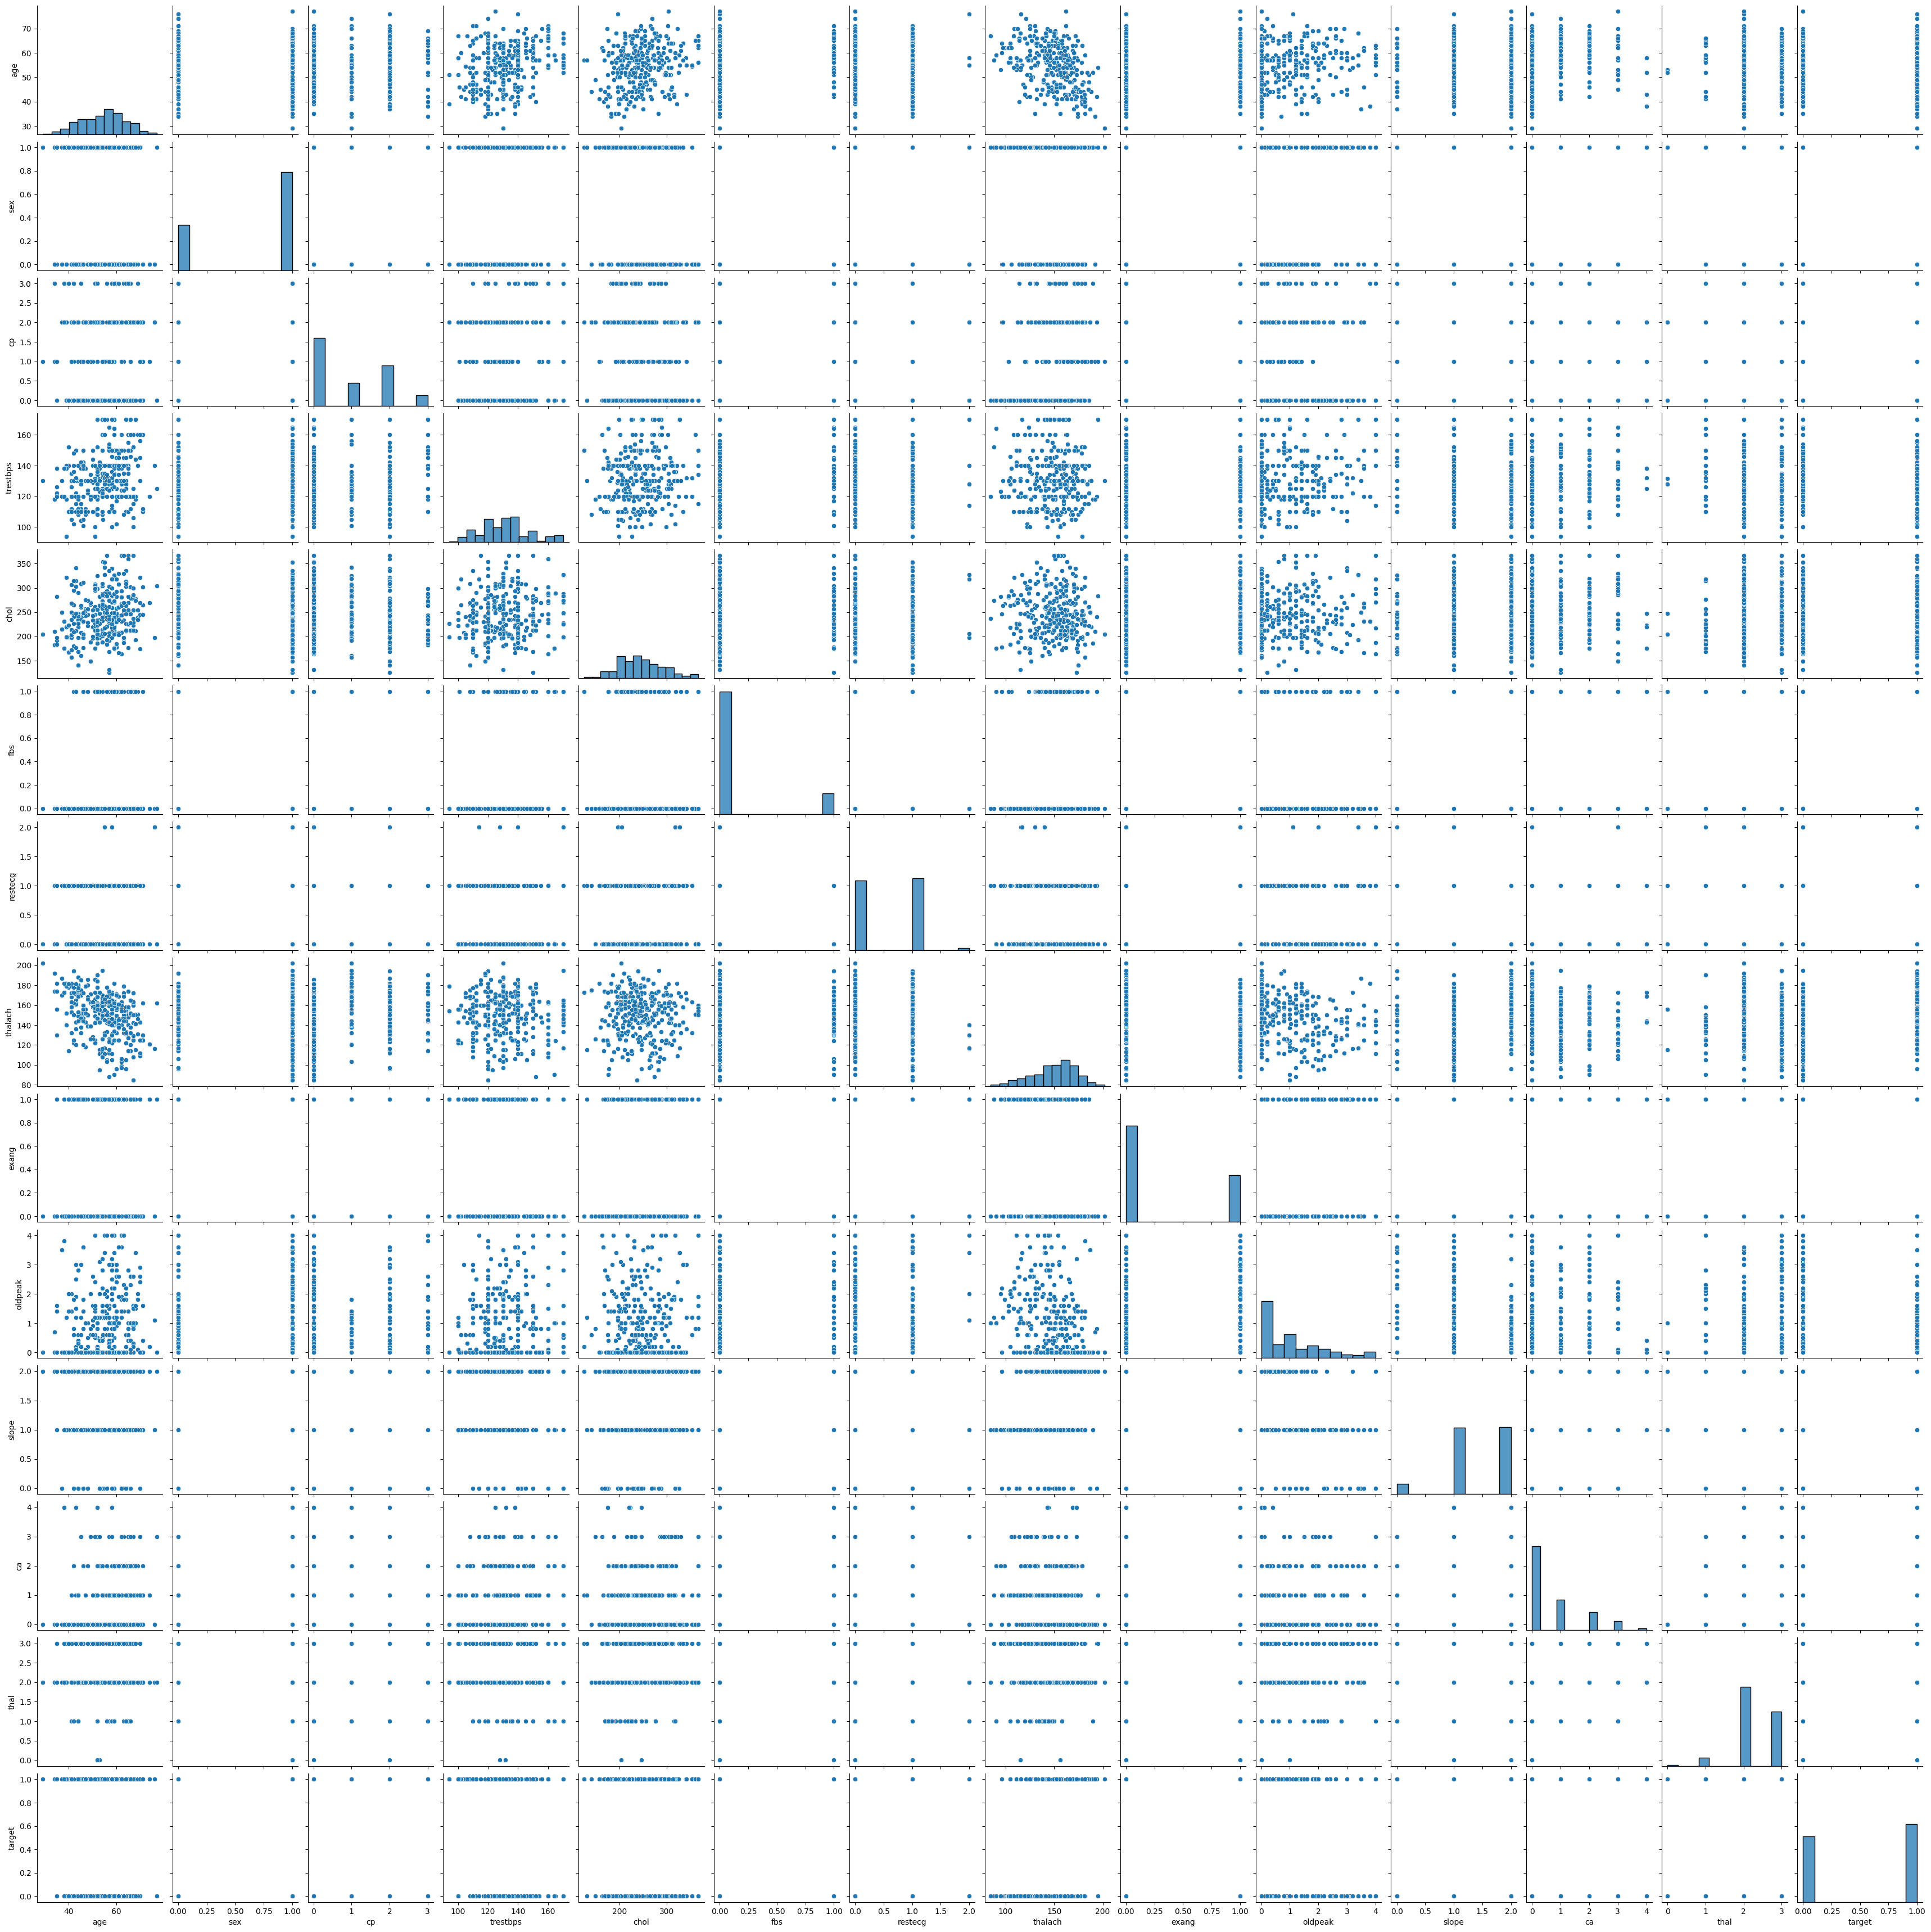

In [46]:
sns.pairplot(data)

In [47]:
data.to_csv('../data/cleaned_data.csv', index=False)

In [48]:
# from google.colab import files
# files.download('cleaned_data.csv')